### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

In [1]:
#import the basic libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#scikit learn libraries for k nearst neighbor 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_recall_curve, roc_curve,plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import set_config
set_config(display='diagram')

### About Dataset
This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes

'Age': customer age in years

'Area Income': Avg. Income of geographical area of consumer

'Daily Internet Usage': Avg. minutes a day consumer is on the internet

'Ad Topic Line': Headline of the advertisement

'City': City of consumer

'Male': Whether or not consumer was male

'Country': Country of consumer

'Timestamp': Time at which consumer clicked on Ad or closed window

'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [2]:
advertize_df=pd.read_csv('advertising.csv')

In [3]:
advertize_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
advertize_df.shape

(1000, 10)

In [5]:
advertize_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
# uniques of the categorical data set
print(f'The number of uniques of ad Topic line is :{advertize_df["Ad Topic Line"].nunique()}')
print('\n')
print(f'The number of uniques of city is :{advertize_df["City"].nunique()}')
print('\n')
print(f'The number of uniques of country is :{advertize_df["Country"].nunique()}')


The number of uniques of ad Topic line is :1000


The number of uniques of city is :969


The number of uniques of country is :237


In [7]:
advertize_df["City"].unique()

array(['Wrightburgh', 'West Jodi', 'Davidton', 'West Terrifurt',
       'South Manuel', 'Jamieberg', 'Brandonstad', 'Port Jefferybury',
       'West Colin', 'Ramirezton', 'West Brandonton', 'East Theresashire',
       'West Katiefurt', 'North Tara', 'West William', 'New Travistown',
       'West Dylanberg', 'Pruittmouth', 'Jessicastad', 'Millertown',
       'Port Jacqueline', 'Lake Nicole', 'South John', 'Pamelamouth',
       'Harperborough', 'Port Danielleberg', 'West Jeremyside',
       'South Cathyfurt', 'Palmerside', 'West Guybury', 'Phelpschester',
       'Lake Melindamouth', 'North Richardburgh', 'Port Cassie',
       'New Thomas', 'Johnstad', 'West Aprilport', 'Kellytown',
       'Charlesport', 'Millerchester', 'Mackenziemouth', 'Zacharystad',
       'North Joshua', 'Bowenview', 'Jamesberg', 'Lake Cassandraport',
       'New Sharon', 'Johnport', 'Hamiltonfort', 'West Christopher',
       'Hollandberg', 'Odomville', 'East Samanthashire', 'South Lauraton',
       'Amandahaven', 'T

In [8]:
advertize_df["Country"].unique()

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
       'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
       'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
       'Palestinian Territory', 'Afghanistan',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
       'Tuvalu', 'Greece', 'British Virgin Islands',
       'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
       'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
       'Saint Helena', 'Liberia', 'Turkmenistan', 'Niger', 'Sri Lanka',
       'Trinidad and Tobago', 'United Kingdom', 'Guinea-Bissau',
       'Micronesia', 'Turkey', 'Croatia', 'Israel',
       'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
       'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
       'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
       'Cook Islands', 'Guatem

In [9]:
advertize_df['Male'].unique()

array([0, 1], dtype=int64)

In [10]:
advertize_df['Clicked on Ad'].unique()

array([0, 1], dtype=int64)

### chechking missing values


In [11]:
advertize_df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [12]:
advertize_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Visualization

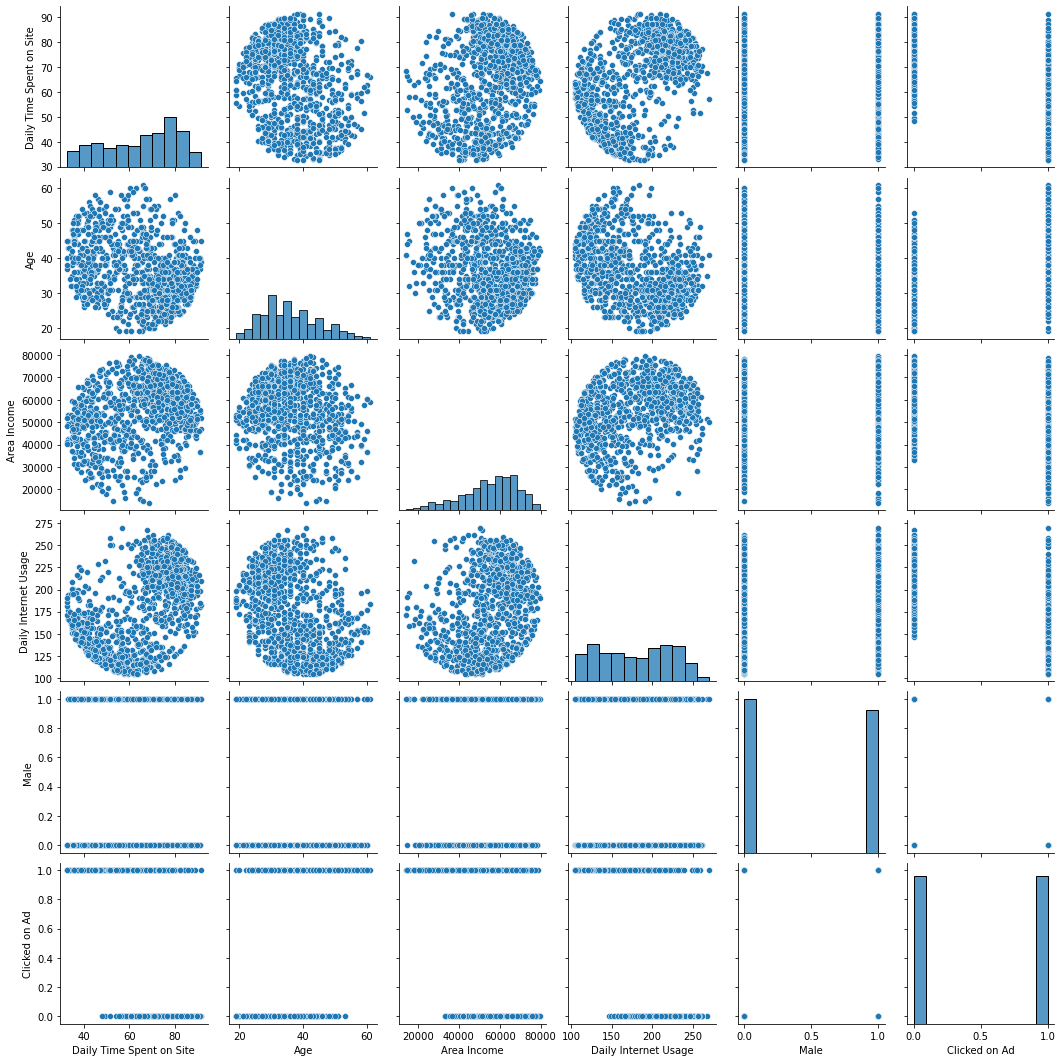

In [13]:
sns.pairplot(advertize_df)

C:\Users\kafub\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

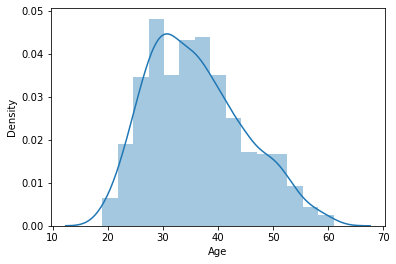

In [14]:
sns.distplot(advertize_df['Age'], bins=15)

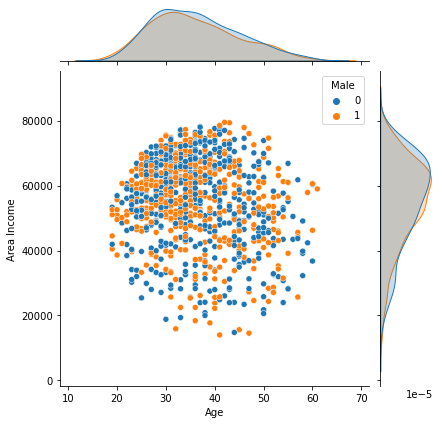

In [15]:
sns.jointplot(data=advertize_df, x ='Age',y='Area Income',hue='Male')

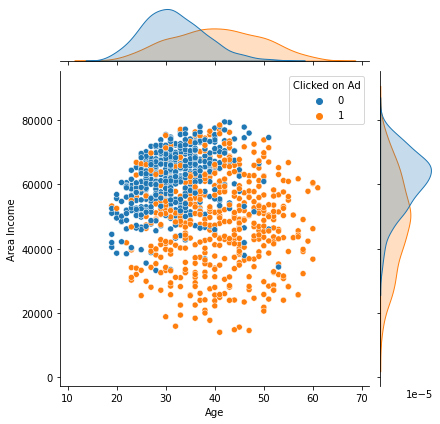

In [16]:
sns.jointplot(data=advertize_df, x ='Age',y='Area Income',hue='Clicked on Ad')

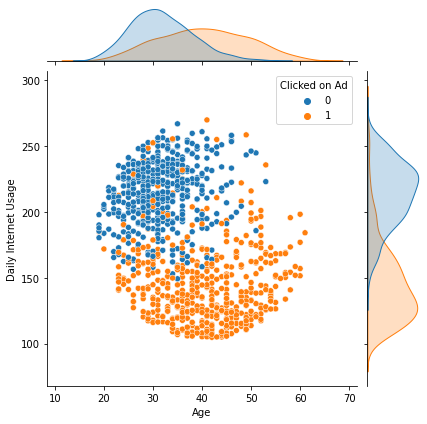

In [17]:
sns.jointplot(data=advertize_df, x ='Age',y='Daily Internet Usage',hue='Clicked on Ad')

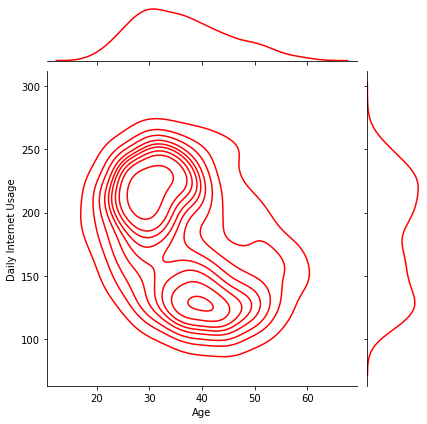

In [18]:
sns.jointplot(data=advertize_df, x ='Age',y='Daily Internet Usage',kind='kde',color='red')

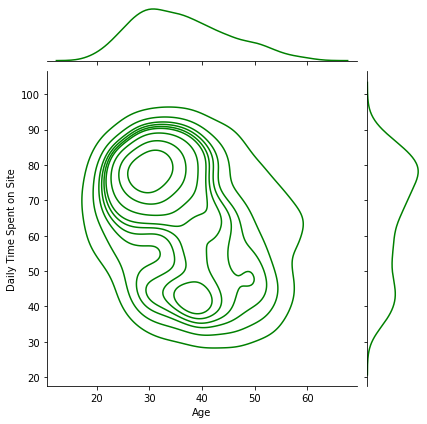

In [19]:
sns.jointplot(data=advertize_df, x ='Age',y='Daily Time Spent on Site',kind='kde',color='green')

C:\Users\kafub\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Male', ylabel='Age'>

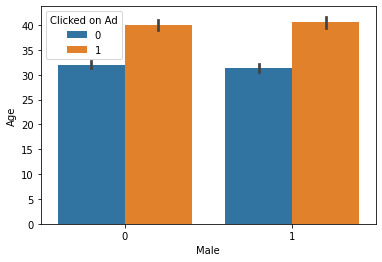

In [20]:
sns.barplot(advertize_df['Male'],advertize_df['Age'], hue=advertize_df['Clicked on Ad'])

<AxesSubplot:>

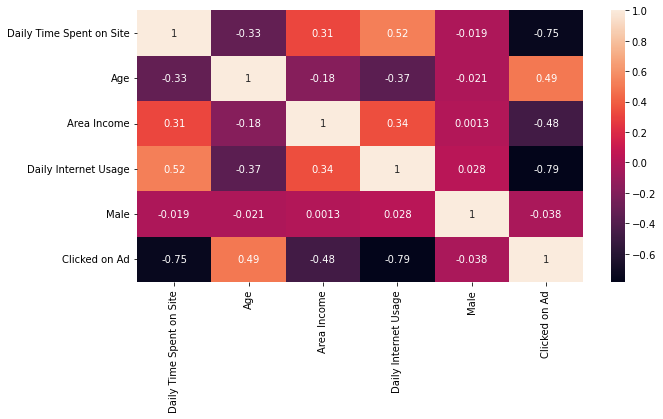

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(advertize_df.corr(), annot=True)

In [22]:
advertize_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Apply the model

In [23]:
# prepare the features and target data set
X=advertize_df.drop(['Clicked on Ad','Timestamp','Ad Topic Line','City'], axis=1)
y=advertize_df['Clicked on Ad']

In [24]:
# split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### baseline 

In [25]:
baseline=advertize_df['Clicked on Ad'].value_counts(normalize=True)
baseline

0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

In [26]:
# create a column transformer
transformer=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Country']),
                                   remainder=StandardScaler())
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Country'])])

In [27]:
# create the pipe 
knn_pipe=Pipeline(
             steps=[('transformer',transformer),
                    ('knn',KNeighborsClassifier())])
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country'])])),
                ('knn', KNeighborsClassifier())])

In [28]:
best_accuracy=knn_pipe.score(X_test,y_test)
best_accuracy

0.9466666666666667

In [29]:
#calculate the false positive
y_pred=knn_pipe.predict(X_test)
fp=(y_pred!=y_test).sum()
print(f'the false postive is: {fp}')

the false postive is: 16


<AxesSubplot:>

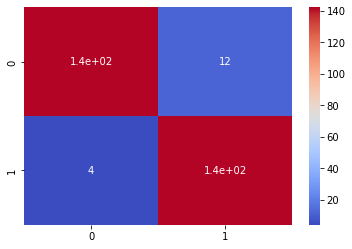

In [30]:
conf_matrix=confusion_matrix(y_pred,y_test)
sns.heatmap(conf_matrix, annot=True,cmap='coolwarm')

In [31]:
def misclassifcation_rate(k):
    knn_pipe=Pipeline(
             steps=[('transformer',transformer),
                    ('knn',KNeighborsClassifier(n_neighbors=k))])
    knn_pipe.fit(X_train,y_train)
    y_pred=knn_pipe.predict(X_test)
    knn_accurancy=accuracy_score(y_test,y_pred)
    misclassification_rate=1-knn_accurancy
    return misclassification_rate

In [32]:
misclassifcation_rate(5)

0.053333333333333344

In [33]:
ks =range(1,200,2)
misclassification_rate=[misclassifcation_rate(k) for k in ks]
misclas_df=pd.DataFrame({'ks':ks,'misclassification_rate':misclassification_rate})
misclas_df.head()

,ks,misclassification_rate
0,1,0.066667
1,3,0.053333
2,5,0.053333
3,7,0.050000
4,9,0.050000


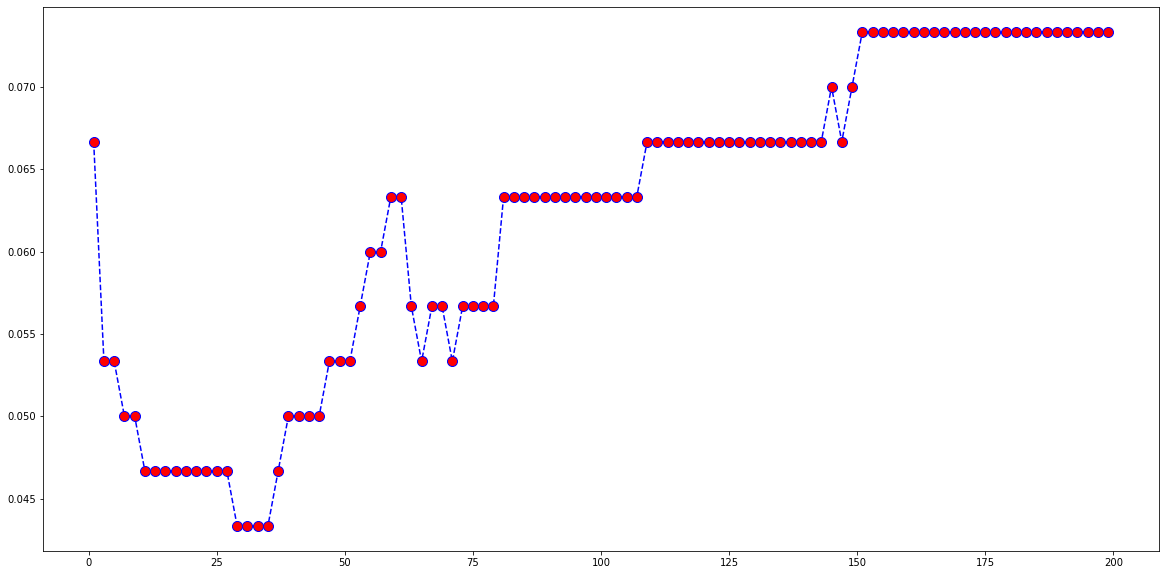

In [34]:
#plot
plt.figure(figsize=(20,10))
plt.plot(range(1,200,2), misclassification_rate, color='blue',linestyle='--', marker='o',markerfacecolor='red', markersize=10)

In [35]:
error_rate=[]
for k in range(1,40,2):
    knn_pipe=Pipeline(
             steps=[('transformer',transformer),
                    ('knn',KNeighborsClassifier(n_neighbors=k))])
    knn_pipe.fit(X_train,y_train)
    y_pred=knn_pipe.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

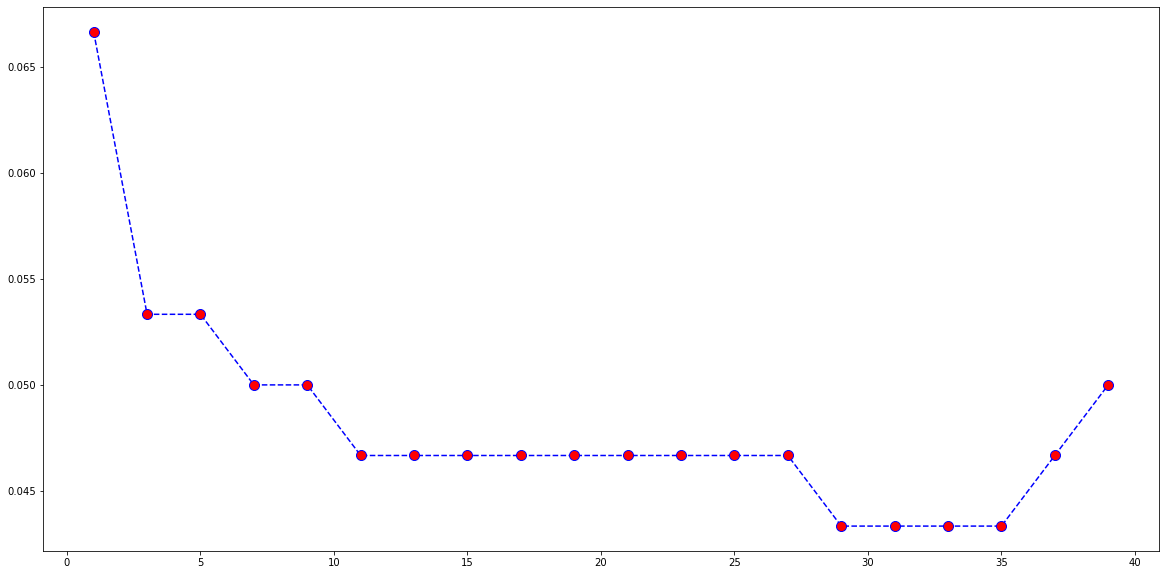

In [36]:
#plot
plt.figure(figsize=(20,10))
plt.plot(range(1,40,2), error_rate, color='blue',linestyle='--', marker='o',markerfacecolor='red', markersize=10)


From the above graph, my best k value is betweeb 29 to 35. Which is at the minimum error rate or misclassfication rate

In [37]:
accuracy_rate=[]
for k in range(1,40,2):
    knn_pipe=Pipeline(
             steps=[('transformer',transformer),
                    ('knn',KNeighborsClassifier(n_neighbors=k))])
    knn_pipe.fit(X_train,y_train)
    y_pred=knn_pipe.predict(X_test)
    accuracy_rate.append(np.mean(y_pred==y_test))

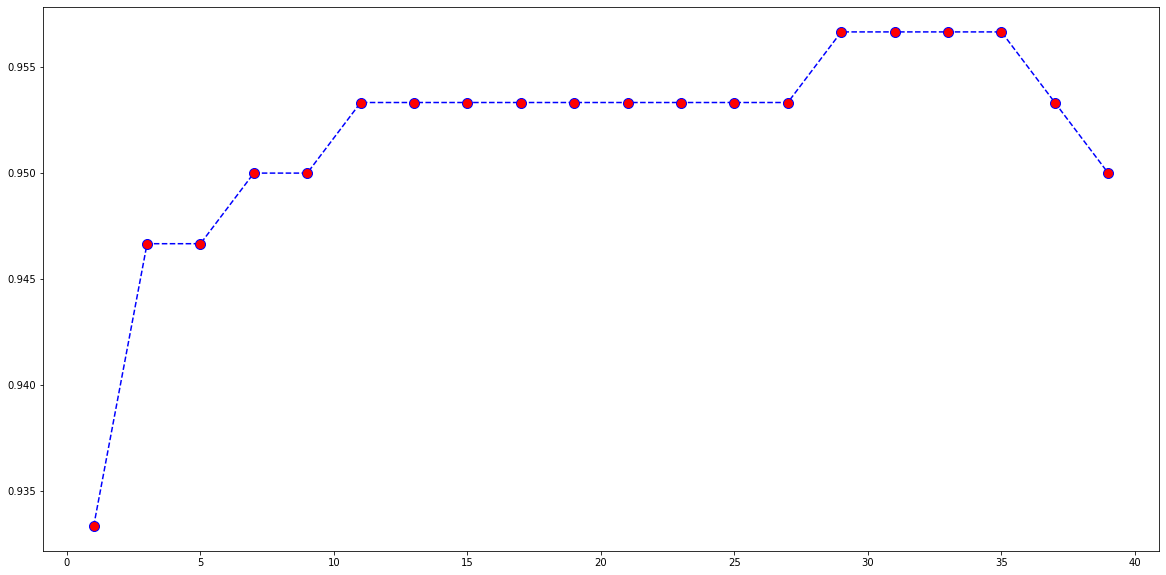

In [38]:
#plot
plt.figure(figsize=(20,10))
plt.plot(range(1,40,2), accuracy_rate, color='blue',linestyle='--', marker='o',markerfacecolor='red', markersize=10)

### Identifying the Best K using GridSearchCV

In [39]:
#create the pipe 
knn_pipe=Pipeline(
             steps=[('transformer',transformer),
                    ('knn',KNeighborsClassifier())])
#create the parameter
params={'knn__n_neighbors':range(1,200,2)}
knn_grid=GridSearchCV(estimator=knn_pipe,
                     param_grid=params,
                     cv=5)
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Country'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 200, 2)})

In [40]:
knn_grid.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country'])])),
                ('knn', KNeighborsClassifier(n_neighbors=19))])

In [41]:
knn_grid.best_params_

{'knn__n_neighbors': 19}

From the Gridsearchcv of only considering the k values, the best k is 19 

In [42]:
knn_grid.best_score_

0.9685714285714286

In [43]:
#lets consider all parameters
#create the pipe 
knn_pipe_wieght=Pipeline(
             steps=[('transformer',transformer),
                    ('knn',KNeighborsClassifier())])
#create the parameter
params={'knn__n_neighbors':range(1,100,2),
       'knn__p':[1,2],
       'knn__weights':['uniform','distance']}
knn_grid_weight=GridSearchCV(estimator=knn_pipe,
                     param_grid=params,
                     cv=5)
knn_grid_weight.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Country'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 100, 2), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']})

In [44]:
knn_grid_weight.best_params_

{'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}

From the Gridsearchcv of considering all parametrs like the n_neighbors, weights, and p value, the best k is 3

In [45]:
knn_grid_weight.best_score_

0.9685714285714286

In [46]:
#Total number of models used
params_list=list(knn_grid_weight.cv_results_['params'])
count=0
for i in params_list:
    count+=1
count*5

1000

### best accuracy

In [47]:
# create the pipe
accuracy=[]
for k in range(1,39,2):
    transformer=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Country']),
                                   remainder=StandardScaler())
    knn_pipe=Pipeline(
             steps=[('transformer',transformer),
                    ('knn',KNeighborsClassifier(n_neighbors=k))])
    knn_pipe.fit(X_train,y_train)
    y_pred=knn_pipe.predict(X_test)
    accuracy.append(accuracy_score(y_pred,y_test))

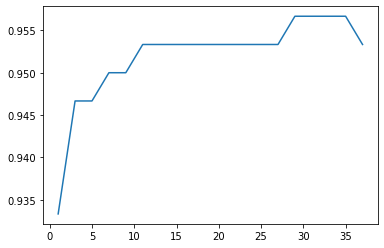

In [48]:
plt.plot(range(1,39,2),accuracy)

In [49]:
list(zip(range(1,39,2),accuracy))

[(1, 0.9333333333333333),
 (3, 0.9466666666666667),
 (5, 0.9466666666666667),
 (7, 0.95),
 (9, 0.95),
 (11, 0.9533333333333334),
 (13, 0.9533333333333334),
 (15, 0.9533333333333334),
 (17, 0.9533333333333334),
 (19, 0.9533333333333334),
 (21, 0.9533333333333334),
 (23, 0.9533333333333334),
 (25, 0.9533333333333334),
 (27, 0.9533333333333334),
 (29, 0.9566666666666667),
 (31, 0.9566666666666667),
 (33, 0.9566666666666667),
 (35, 0.9566666666666667),
 (37, 0.9533333333333334)]

The model has higher accurany at 29,31,33,35 which have equal values 

I picked up any number of 29,31,33,and 35 for my best k values 

### classification reports

In [50]:
transformer=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Country']),
                                   remainder=StandardScaler())
knn_model_pipe=Pipeline(
             steps=[('transformer',transformer),
                    ('knn',KNeighborsClassifier(n_neighbors=33))])
knn_model_pipe.fit(X_train,y_train)
y_pred=knn_model_pipe.predict(X_test)

In [51]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       157
           1       0.92      0.99      0.96       143

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [52]:
print(f'precission when pos label 0 is :{precision_score(y_pred,y_test,pos_label=0)}')
print('\n')
print(f'precission when pos label 1 is :{precision_score(y_pred,y_test,pos_label=1)}')


precission when pos label 0 is :0.9931506849315068


precission when pos label 1 is :0.922077922077922


In [53]:
print(f'recall when pos label 0 is :{recall_score(y_pred,y_test,pos_label=0)}')
print('\n')
print(f'recall when pos label 1 is :{recall_score(y_pred,y_test,pos_label=1)}')

recall when pos label 0 is :0.9235668789808917


recall when pos label 1 is :0.993006993006993


In [54]:
base_fp = 0
for i, j in zip(y_pred, y_test):
    if i == 0:
        if j == 1:
            base_fp += 1
print(base_fp)

12


My model has a false positive 12 

In [55]:
base_fn = 0
for i, j in zip(y_pred, y_test):
    if i == 1:
        if j == 0:
            base_fn += 1
print(base_fn)

1


My model has a false negative is 1

<AxesSubplot:>

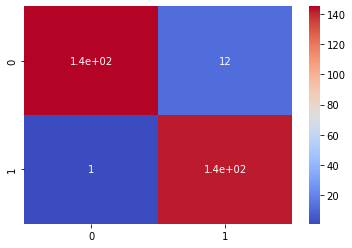

In [56]:
# confusion matrix from seaborn heatmap
conf_matrix=confusion_matrix(y_pred,y_test,labels=knn_model_pipe.classes_)
sns.heatmap(conf_matrix, annot=True,cmap='coolwarm')

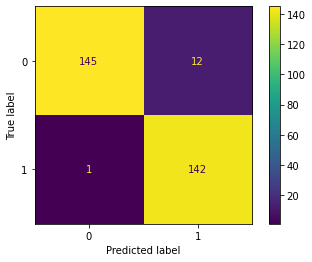

In [57]:
# confusion matrix from scikit learn built tool ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels = [0,1])
disp.plot()
plt.show()

### Decision Boundaries 

To change the thresholds for classifying observations, we will use a predict_proba method of the fit estimator 

My model has higher number for the false positive and want to reduce it.

In [58]:
# First compute the predict probabilities (model.predict_proba(X_test))
pd.DataFrame(knn_model_pipe.predict_proba(X_test))

,0,1
0,0.121212,0.878788
1,0.000000,1.000000
2,0.000000,1.000000
3,0.030303,0.969697
4,1.000000,0.000000
...,...,...
295,0.000000,1.000000
296,1.000000,0.000000
297,0.000000,1.000000
298,0.000000,1.000000


In [59]:
base_probs = knn_model_pipe.predict_proba(X_test)
strict_preds = np.where(base_probs[:, 0] > .8, 0,1)
strict_fp = 0
for i, j in zip(strict_preds, y_test):
    if i == 0:
        if j == 1:
            strict_fp += 1
print(strict_fp)

5


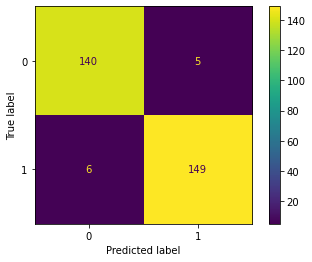

In [60]:
conf_matrix=confusion_matrix(strict_preds,y_test,labels=knn_model_pipe.classes_)
disp_strict=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels = [0,1])
disp_strict.plot()
plt.show()

### Results after decision boundary applied

In [61]:
print(classification_report(strict_preds,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       145
           1       0.97      0.96      0.96       155

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [62]:
print(f'precission when pos label 0 is :{precision_score(strict_preds,y_test,pos_label=0)}')
print('\n')
print(f'precission when pos label 1 is :{precision_score(strict_preds,y_test,pos_label=1)}')

precission when pos label 0 is :0.958904109589041


precission when pos label 1 is :0.9675324675324676


In [63]:
print(f'recall when pos label 0 is :{recall_score(y_pred,y_test,pos_label=0)}')
print('\n')
print(f'recall when pos label 1 is :{recall_score(y_pred,y_test,pos_label=1)}')

recall when pos label 0 is :0.9235668789808917


recall when pos label 1 is :0.993006993006993


### Evaluation Curves: Precision vs. Recall and ROC

In [68]:
#compute precision and recall at different values of threshold
#precission
transformer=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Country']),
                                   remainder=StandardScaler())
knn_model_pipe=Pipeline(
             steps=[('transformer',transformer),
                    ('knn',KNeighborsClassifier(n_neighbors=33))])
knn_model_pipe.fit(X_train,y_train)
pred_probs=knn_model_pipe.predict_proba(X_test)

In [80]:
precision, recall, boundaries = precision_recall_curve(y_test, pred_probs[:, 1], pos_label=1)

In [85]:
len(boundaries)

28

In [89]:
len(precision[:28])

28

In [101]:
p_r_result_df=pd.DataFrame({'Boundary':boundaries,'precision':precision[:28],'recall':recall[:28]})
p_r_result_df.head(10)

,Boundary,precision,recall
0,0.000000,0.513333,1.000000
1,0.030303,0.710280,0.987013
2,0.060606,0.829670,0.980519
3,0.090909,0.881657,0.967532
4,0.121212,0.914110,0.967532
5,0.151515,0.931250,0.967532
6,0.181818,0.937107,0.967532
7,0.212121,0.961290,0.967532
8,0.242424,0.967532,0.967532
9,0.272727,0.967105,0.954545


<AxesSubplot:>

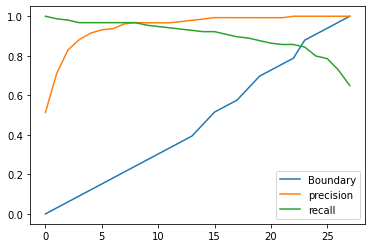

In [102]:
p_r_result_df.plot()

Text(0.5, 1.0, 'Precision vs Recall from sklearn')

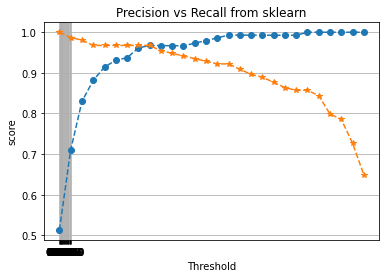

In [91]:
plt.plot(precision[:28], '--o')
plt.plot(recall[:28],'--*' )
plt.xticks(boundaries);
plt.grid()
plt.ylabel('score')
plt.xlabel('Threshold')
plt.title('Precision vs Recall from sklearn')

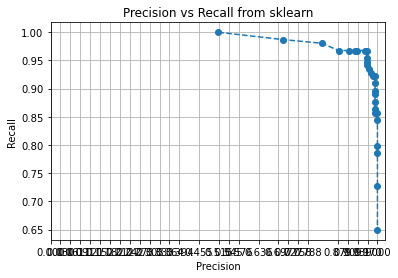

In [92]:
plt.plot(precision[:28], recall[:28], '--o')
plt.xticks(boundaries);
plt.grid()
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall from sklearn');

### ROC Curve
Similar to the precision_recall_curve the roc_curve function takes in y_true and y_score which can be predicted probabilities. The function returns the false positive rates, true positive rates, and thresholds. Assign these to fpr, tpr, and thresh_rocs below. Uncomment the code to visualize the ROC curve.

In [77]:
fpr, tpr, thresh_rocs = roc_curve(y_test, pred_probs[:, 1], pos_label=1)
thresh_rocs

array([2.        , 1.        , 0.96969697, 0.93939394, 0.90909091,
       0.87878788, 0.78787879, 0.75757576, 0.72727273, 0.63636364,
       0.57575758, 0.51515152, 0.45454545, 0.33333333, 0.27272727,
       0.24242424, 0.21212121, 0.18181818, 0.15151515, 0.12121212,
       0.09090909, 0.06060606, 0.03030303, 0.        ])

In [95]:
len(thresh_rocs)

24

In [98]:
rocs_result_df=pd.DataFrame({'rocs_threshold':thresh_rocs,'roc_false_positive':fpr,'roc_true_positive':tpr})
rocs_result_df.head(10)

,rocs_threshold,roc_false_positive,roc_true_positive
0,2.000000,0.000000,0.000000
1,1.000000,0.000000,0.649351
2,0.969697,0.000000,0.727273
3,0.939394,0.000000,0.785714
4,0.909091,0.000000,0.798701
5,0.878788,0.000000,0.844156
6,0.787879,0.000000,0.857143
7,0.757576,0.006849,0.857143
8,0.727273,0.006849,0.863636
9,0.636364,0.006849,0.889610


<AxesSubplot:>

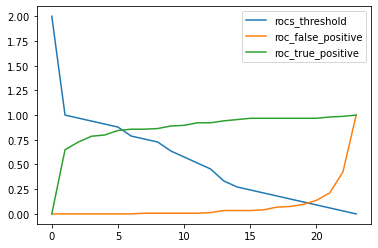

In [100]:
rocs_result_df.plot()

Text(0.5, 1.0, 'Precision vs Recall from sklearn')

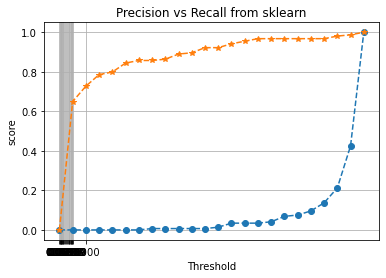

In [96]:
plt.plot(fpr[:24], '--o')
plt.plot(tpr[:24],'--*' )
plt.xticks(thresh_rocs);
plt.grid()
plt.ylabel('score')
plt.xlabel('Threshold')
plt.title('Precision vs Recall from sklearn')

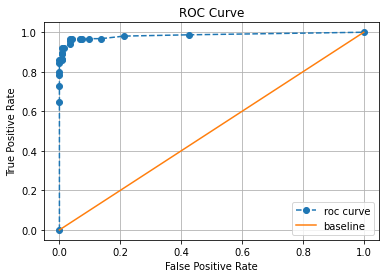

In [103]:
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid();

In [104]:
def precision_thresh(pred_probs, 
                  y_test, 
                  thresh):
    preds = np.where(pred_probs >=thresh, 1,0)
    return precision_score(y_test, preds, pos_label=1)

In [105]:
thresholds = np.arange(0, 1, .1)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [106]:
[precision_thresh(pred_probs[:,1], y_test, i) for i in thresholds]

[0.5133333333333333,
 0.9141104294478528,
 0.9612903225806452,
 0.9668874172185431,
 0.9861111111111112,
 0.993006993006993,
 0.9927536231884058,
 0.9925373134328358,
 1.0,
 1.0]

In [109]:
precision_df = pd.DataFrame({'threshold':thresholds, 'precision': [precision_thresh(pred_probs[:,1], y_test, i) for i in thresholds]})
precision_df

,threshold,precision
0,0.0,0.513333
1,0.1,0.914110
2,0.2,0.961290
3,0.3,0.966887
4,0.4,0.986111
5,0.5,0.993007
6,0.6,0.992754
7,0.7,0.992537
8,0.8,1.000000
9,0.9,1.000000


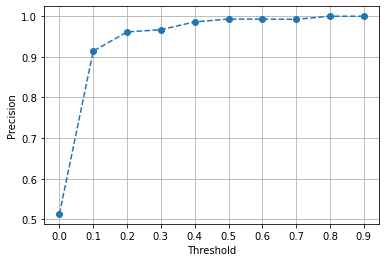

In [110]:
plt.plot(precision_df['threshold'], precision_df['precision'], '--o', label = 'precision')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.grid();

In [111]:
def recall_thresh(y_test,thresh):
    transformer=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Country']),
                                   remainder=StandardScaler())
    knn_model_pipe=Pipeline(
             steps=[('transformer',transformer),
                    ('knn',KNeighborsClassifier(n_neighbors=33))])
    knn_model_pipe.fit(X_train,y_train)
    pred_probs=knn_model_pipe.predict_proba(X_test)
    preds=np.where(pred_probs[:,1]>thresh,1,0)
    return recall_score(preds,y_test)   

In [112]:
thresholds = np.arange(0, 1, .1)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [114]:
[recall_thresh(y_test, i) for i in thresholds]

[0.7102803738317757,
 0.9141104294478528,
 0.9612903225806452,
 0.9668874172185431,
 0.9861111111111112,
 0.993006993006993,
 0.9927536231884058,
 0.9925373134328358,
 1.0,
 1.0]

In [115]:
recall_df = pd.DataFrame({'threshold':thresholds, 'Recall': [recall_thresh(y_test, i) for i in thresholds]})
recall_df

,threshold,Recall
0,0.0,0.710280
1,0.1,0.914110
2,0.2,0.961290
3,0.3,0.966887
4,0.4,0.986111
5,0.5,0.993007
6,0.6,0.992754
7,0.7,0.992537
8,0.8,1.000000
9,0.9,1.000000


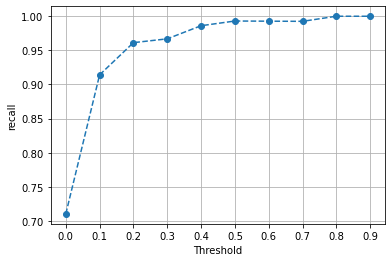

In [116]:
plt.plot(precision_df['threshold'], recall_df['Recall'], '--o', label = 'recall')
plt.xticks(thresholds)
plt.xlabel('Threshold')
plt.ylabel('recall')
plt.grid();